In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#  also install openpyxl

*Please Note down that we are not converting the excel file into csv in preprocessing,* <br>
*as we made use of the `openpyxl` library to read the excel file directly.*

In [2]:
df = pd.read_excel('cleaned_data.xlsx')

***
## `Pre-processing` 

In [3]:
df['Price_per_unit_area'] = df['Price_per_unit_area'].apply(lambda x : float(str(x).replace(",","")))
df['Size'] = df['Size'].apply(lambda x: int(x[:-6].replace(",","")) )
df['Price'] = df['Price'].apply(lambda x: float(x.replace(",","")))

* As we can see here, we first remove al the radix points `(",")` from the data and then we convert the data into a list of integers or floats.
* Size of the properties were defined as **"x sq ft"** , therefore we dont need the last 6 characters and only need the number, Hence we take the number and remove radix points.


***
# `Q1`

**Here, we create a function to map the prices to budget ranges**

***The measure taken for budget in this case is `Price_per_unit_area` and not just `Price`***

##### We have divided the `Price_per_unit_area` into three categories,: 
* *`Low Budget`*    : less than *10000* Rs / sq. ft.
* *`Medium Budget`* : *10001 - 30000* Rs / sq. ft.
* *`High Budget`*   : *greater than 30001* Rs / sq. ft.

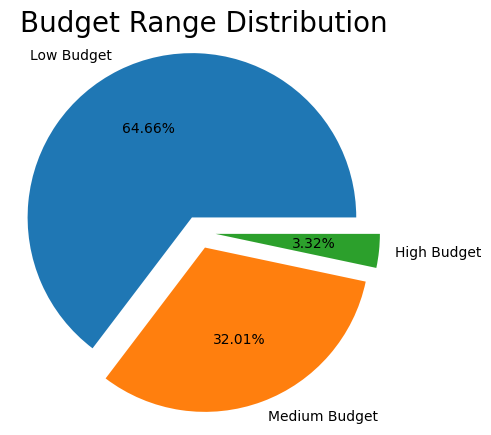

budget_range
Low Budget       92928
Medium Budget    46005
High Budget       4775
Name: count, dtype: int64

In [4]:
budget_ranges = [
    {"label": "Low Budget", "min": 0, "max": 10000},
    {"label": "Medium Budget", "min": 10001, "max": 30000},
    {"label": "High Budget", "min": 30001, "max": float("inf")}
]

budget_by_price = [
    {"label": "Low Budget", "min": 1, "max": 10000000},
    {"label": "Medium Budget", "min": 10000001, "max": 30000000},
    {"label": "High Budget", "min": 30000001, "max": float("inf")}
]

def categorize_budget(row):
    for budget_range in budget_ranges:
        if budget_range["min"] <= row["Price_per_unit_area"] <= budget_range["max"]:
            return budget_range["label"]
        
def categorize_budget_by_price(row):
    for budget_range in budget_ranges:
        if budget_range["min"] <= row["Price"] <= budget_range["max"]:
            return budget_range["label"]

df["budget_by_price"] = df.apply(categorize_budget_by_price, axis=1)
df["budget_range"] = df.apply(categorize_budget, axis=1)

budget_range_counts = df["budget_range"].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(budget_range_counts, labels=budget_range_counts.index,
        autopct="%.2f%%", explode=(0.1, 0.1, 0.1))
plt.title("Budget Range Distribution", fontsize=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

budget_range_counts

### `Result`
* There are **92928** properties in *Low Budget* category
* There are **46005** properties in *Medium Budget* category 
* There are **4775** properties in *High Budget* category 


**Note** : *we could have used the NumPy apply() method as well, but here `for` loop was used for readability and is still vectorized.*

***


# `Q2`

*Here, we are using the metrics of `min`, `mean` and `max` to analyze the distribution of all the data based on their Size, Price and Price per unit area.*

In [5]:
summary_stats = df.groupby("budget_range")[["Price", "Size", "Price_per_unit_area"]].agg(["min","mean","max"])
summary_stats


Price                            Size                      \
                     min          mean          max  min         mean    max   
budget_range                                                                   
High Budget    5900000.0  6.577620e+07  800000000.0  127  1550.456545  17936   
Low Budget      100000.0  7.870599e+06  152500000.0  113  1299.659102  90000   
Medium Budget  1550000.0  1.991673e+07  500000000.0  100  1205.761982  19000   

              Price_per_unit_area                          
                              min          mean       max  
budget_range                                               
High Budget               30001.0  40790.571937  171969.0  
Low Budget                  104.0   6046.117769   10000.0  
Medium Budget             10002.0  16866.655124   30000.0

In [6]:
summary_stats["Price"]

,min,mean,max
budget_range,,,
High Budget,5900000.0,6.577620e+07,800000000.0
Low Budget,100000.0,7.870599e+06,152500000.0
Medium Budget,1550000.0,1.991673e+07,500000000.0


In [7]:
summary_stats["Size"]


,min,mean,max
budget_range,,,
High Budget,127,1550.456545,17936
Low Budget,113,1299.659102,90000
Medium Budget,100,1205.761982,19000


In [8]:
summary_stats["Price_per_unit_area"]

,min,mean,max
budget_range,,,
High Budget,30001.0,40790.571937,171969.0
Low Budget,104.0,6046.117769,10000.0
Medium Budget,10002.0,16866.655124,30000.0


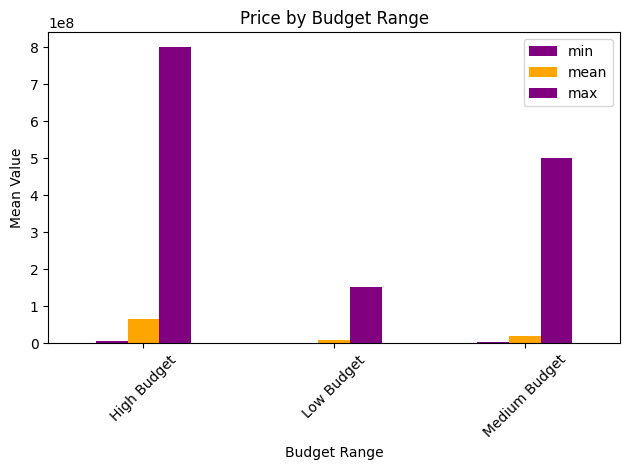

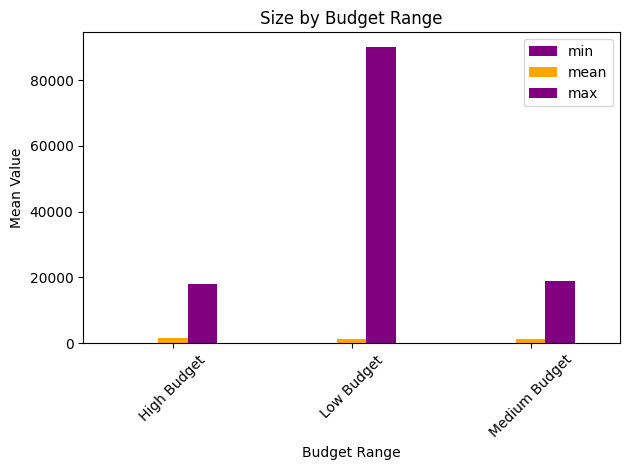

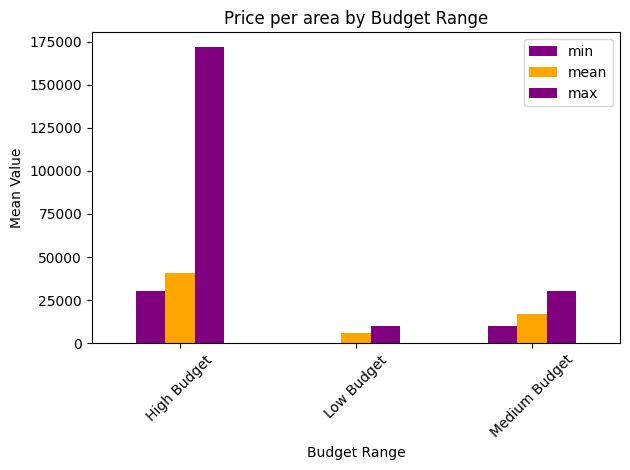

In [9]:

summary_stats["Price"].plot(kind="bar", color=["purple", "orange"])
plt.title("Price by Budget Range")
plt.xlabel("Budget Range")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

summary_stats["Size"].plot(kind="bar", color=["purple", "orange"])
plt.title("Size by Budget Range")
plt.xlabel("Budget Range")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

summary_stats["Price_per_unit_area"].plot(kind="bar", color=["purple", "orange"])
plt.title("Price per area by Budget Range")
plt.xlabel("Budget Range")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



#### *The above representation in the charts can summarize the whole data very well with respect to budgets*  
***

# `Q3`


In [10]:
hyderabad_data= df[df['City_name']=='Hyderabad']
bangalore_data= df[df['City_name']=='Bangalore']

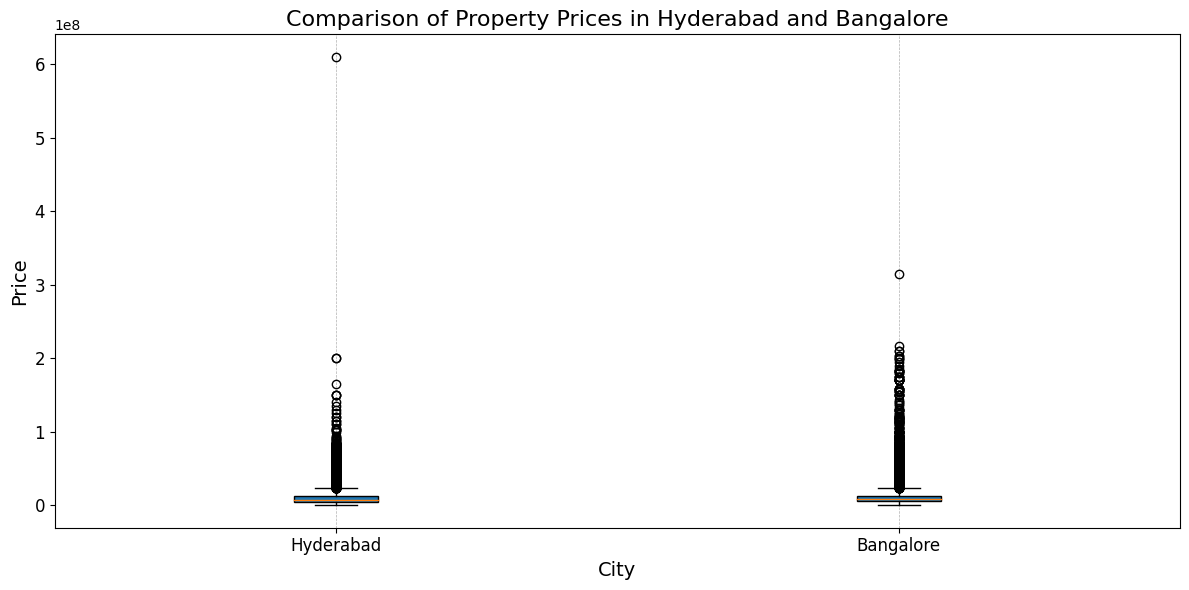

In [11]:
plt.figure(figsize=(12, 6))
plt.boxplot([hyderabad_data["Price"], bangalore_data["Price"]],
            labels=["Hyderabad", "Bangalore"], patch_artist=True)
plt.title("Comparison of Property Prices in Hyderabad and Bangalore", fontsize=16)
plt.xlabel("City", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()



* *As we can see, their interquartile ranges are almost very similar and so are their wicks*

* *Hyderabad has an outlier which is very far from the highest outlier of Bangalore*


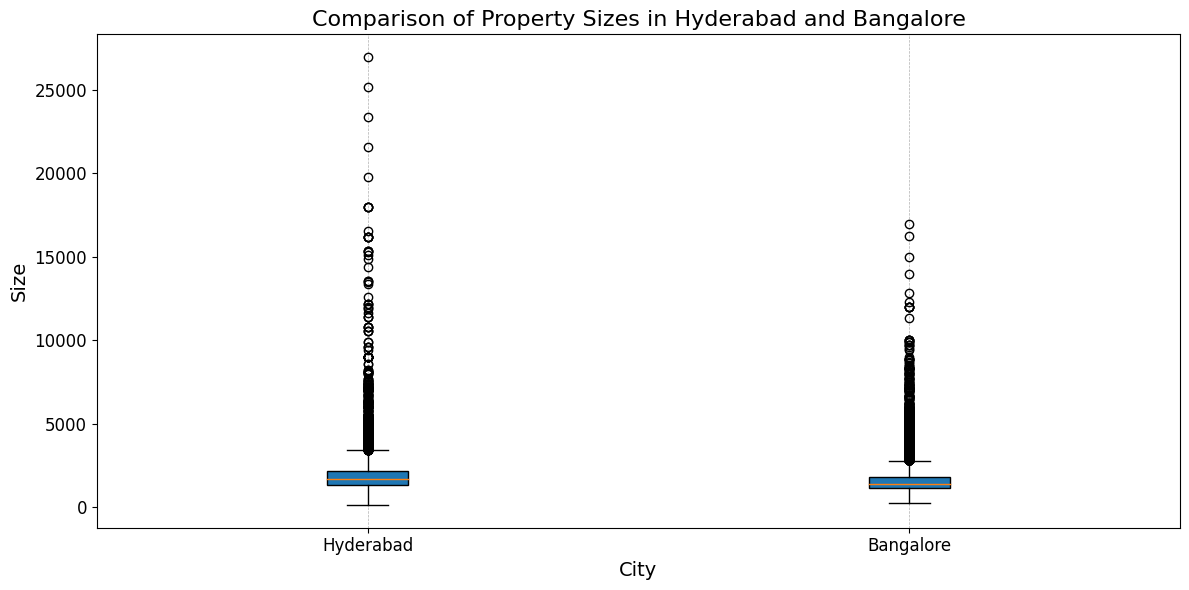

In [12]:
plt.figure(figsize=(12, 6))
plt.boxplot([hyderabad_data["Size"], bangalore_data["Size"]],
            labels=["Hyderabad", "Bangalore"], patch_artist=True)
plt.title("Comparison of Property Sizes in Hyderabad and Bangalore", fontsize=16)
plt.xlabel("City", fontsize=14)
plt.ylabel("Size", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()



* *In terms of size, we can now see , Hyderabad has a bigger inter-quartile range and an even bigger wick , meaning that Hyderabad as bigger area properties than Bangalore.*

* *Hyderabad has a lot of outliers in the higher range*

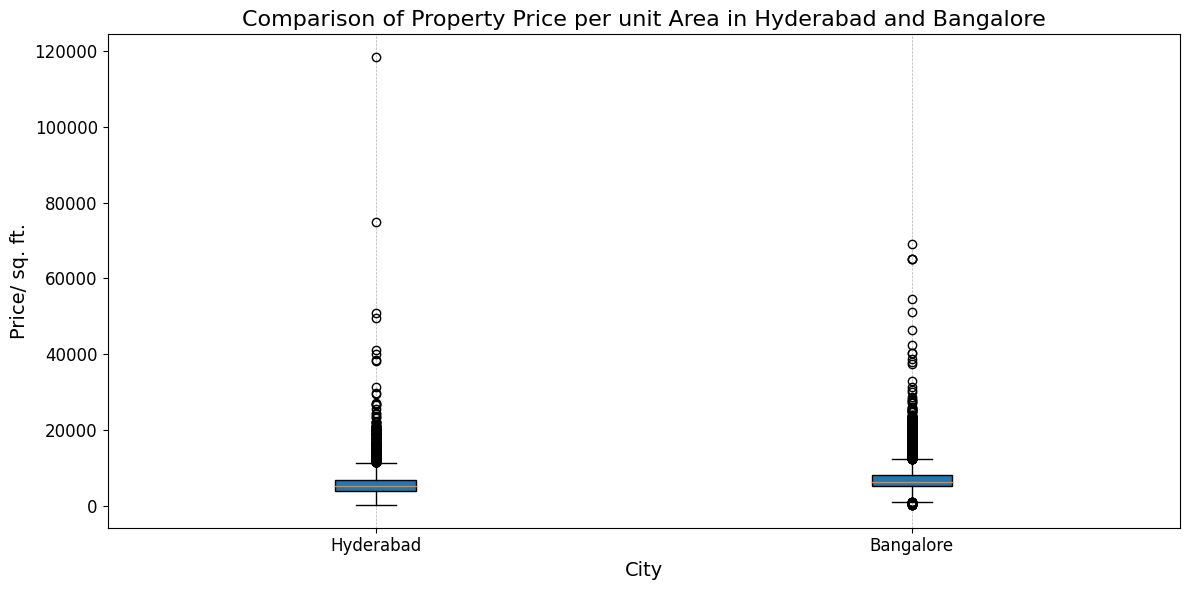

In [13]:
plt.figure(figsize=(12, 6))
plt.boxplot([hyderabad_data["Price_per_unit_area"], bangalore_data["Price_per_unit_area"]],
            labels=["Hyderabad", "Bangalore"], patch_artist=True)
plt.title(
    "Comparison of Property Price per unit Area in Hyderabad and Bangalore", fontsize=16)
plt.xlabel("City", fontsize=14)
plt.ylabel("Price/ sq. ft.", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

* *In terms of price per unit area as well, we can see Bangalore has higher price per area in general than Hyderabad*
 
 ---

# `Q4`


* Taking median of the price per locality 

In [14]:
locality_price_means = df.groupby(['City_name', 'Locality_Name'])['Price'].median()

avg = locality_price_means.median()

expensive_localities = df[(df["Price"] >= avg) & (df["budget_by_price"]=="High Budget")]
less_expensive_localities = df[(df["Price"] < avg) & (df["budget_by_price"]=="High Budget")]


* Took median of whole data and divided the localities based on if they are in the fisrt half or the second, all being a part of High-Budget properties ( *>30000 Rs/sq ft* ). 


* Now for every city, we will include their localites and see which part of the spectrum do they fall on

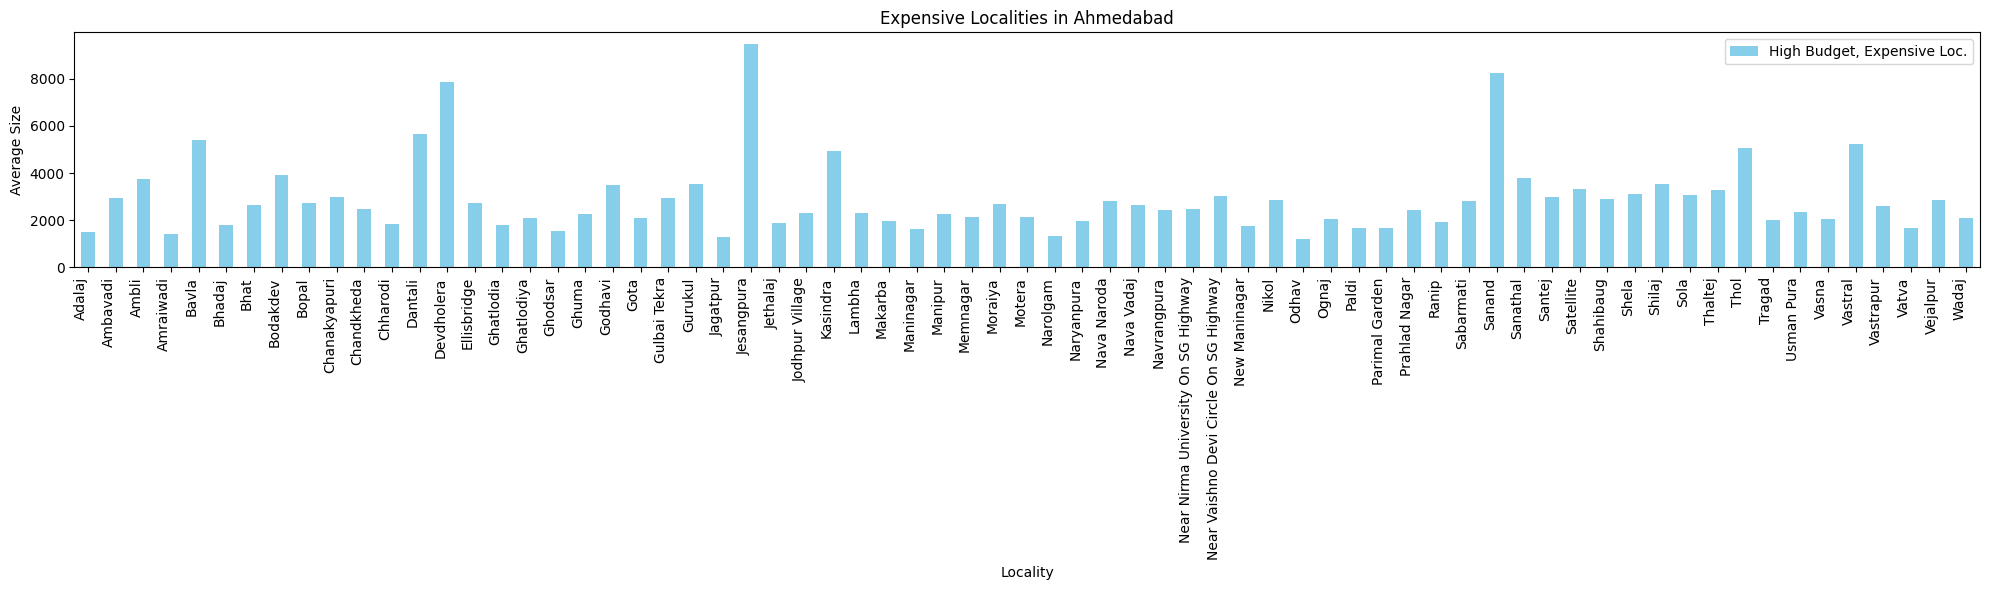

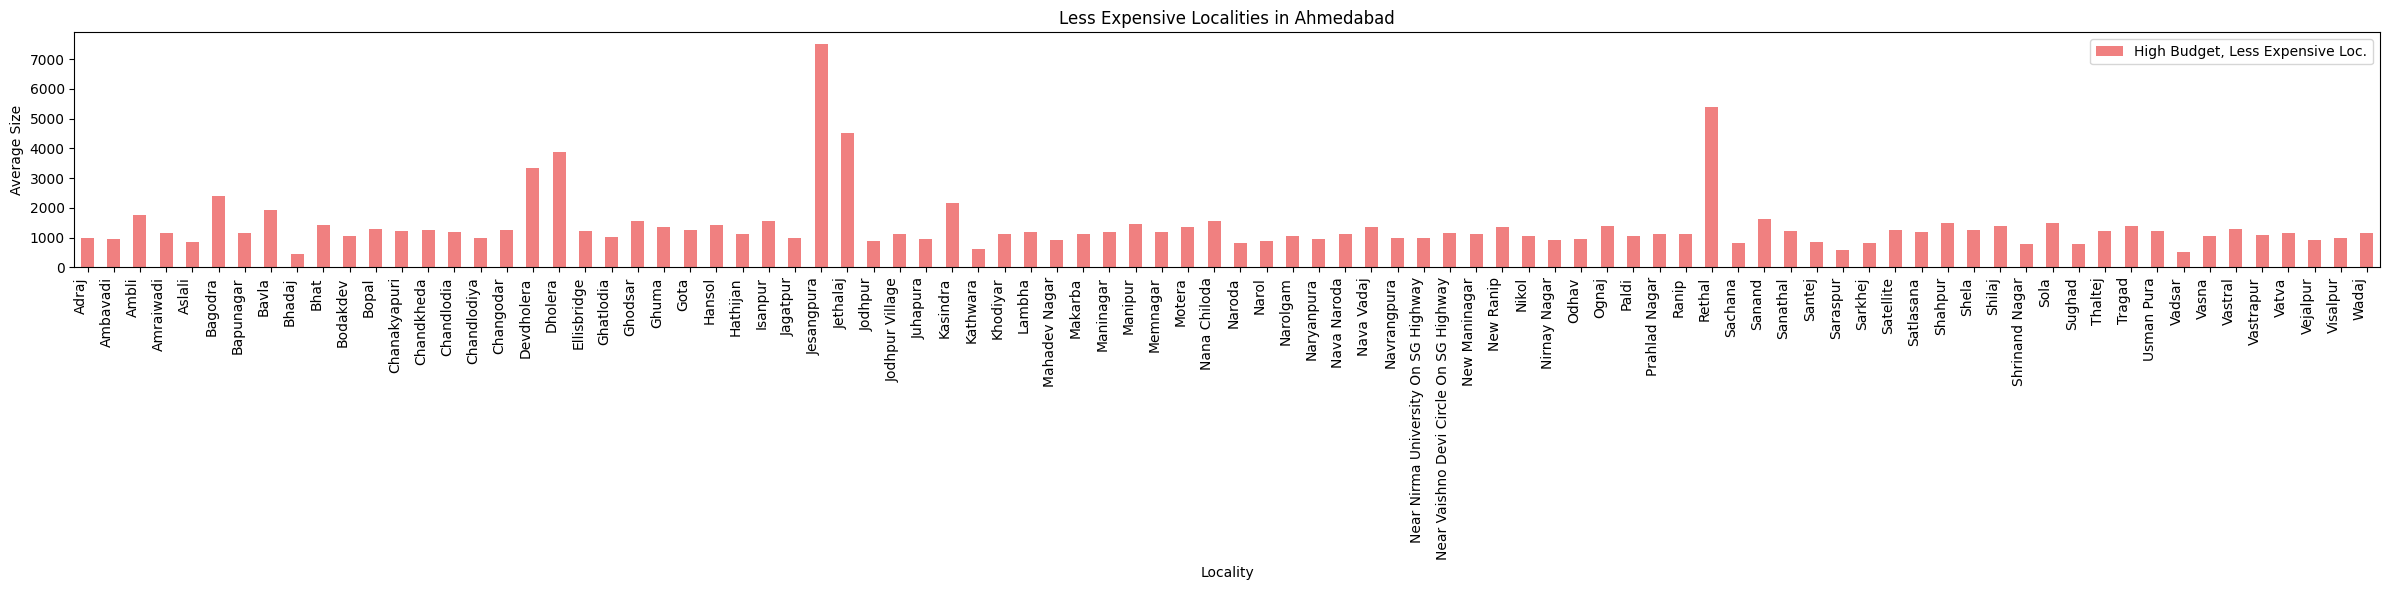

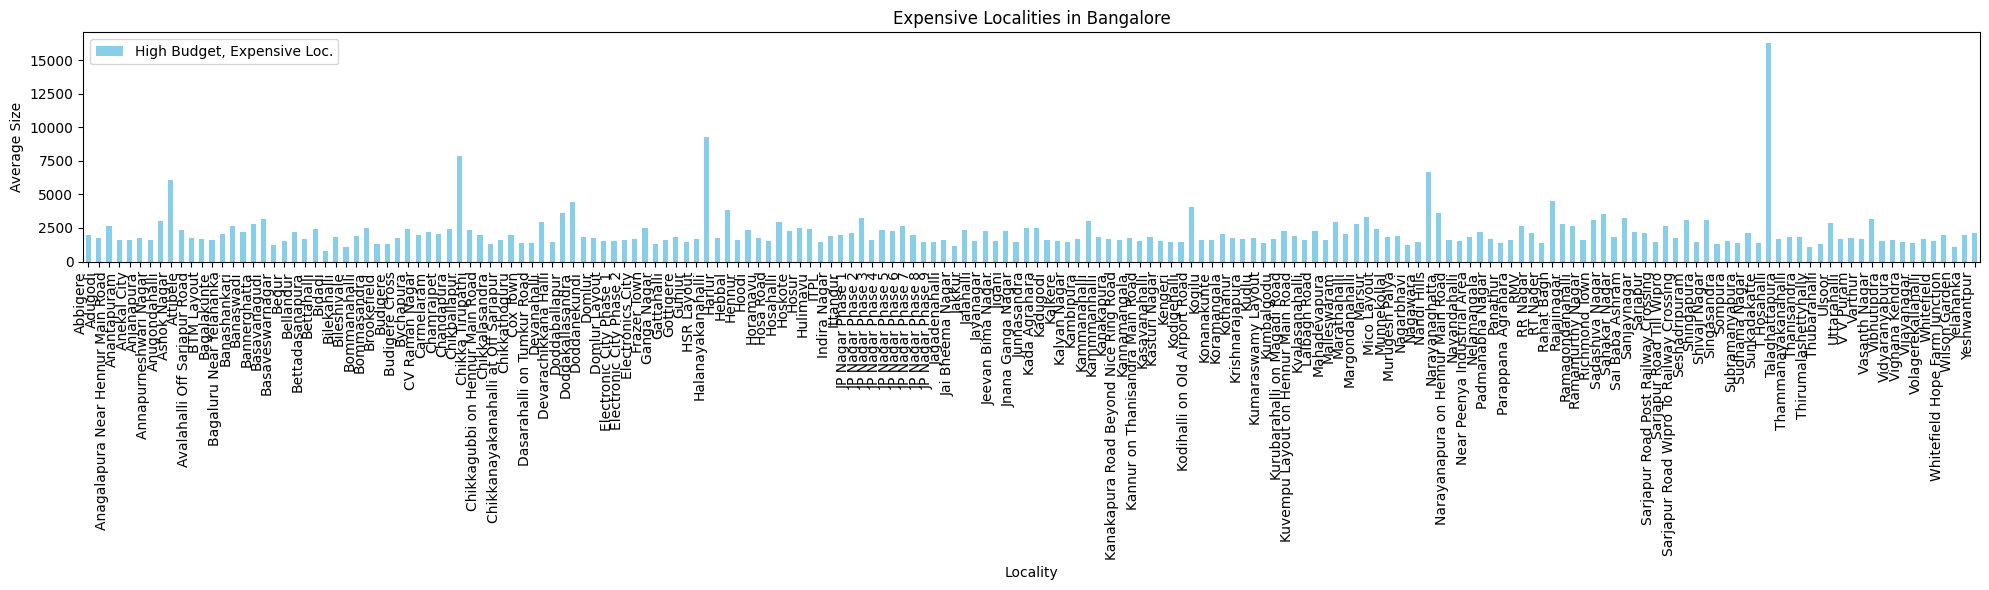

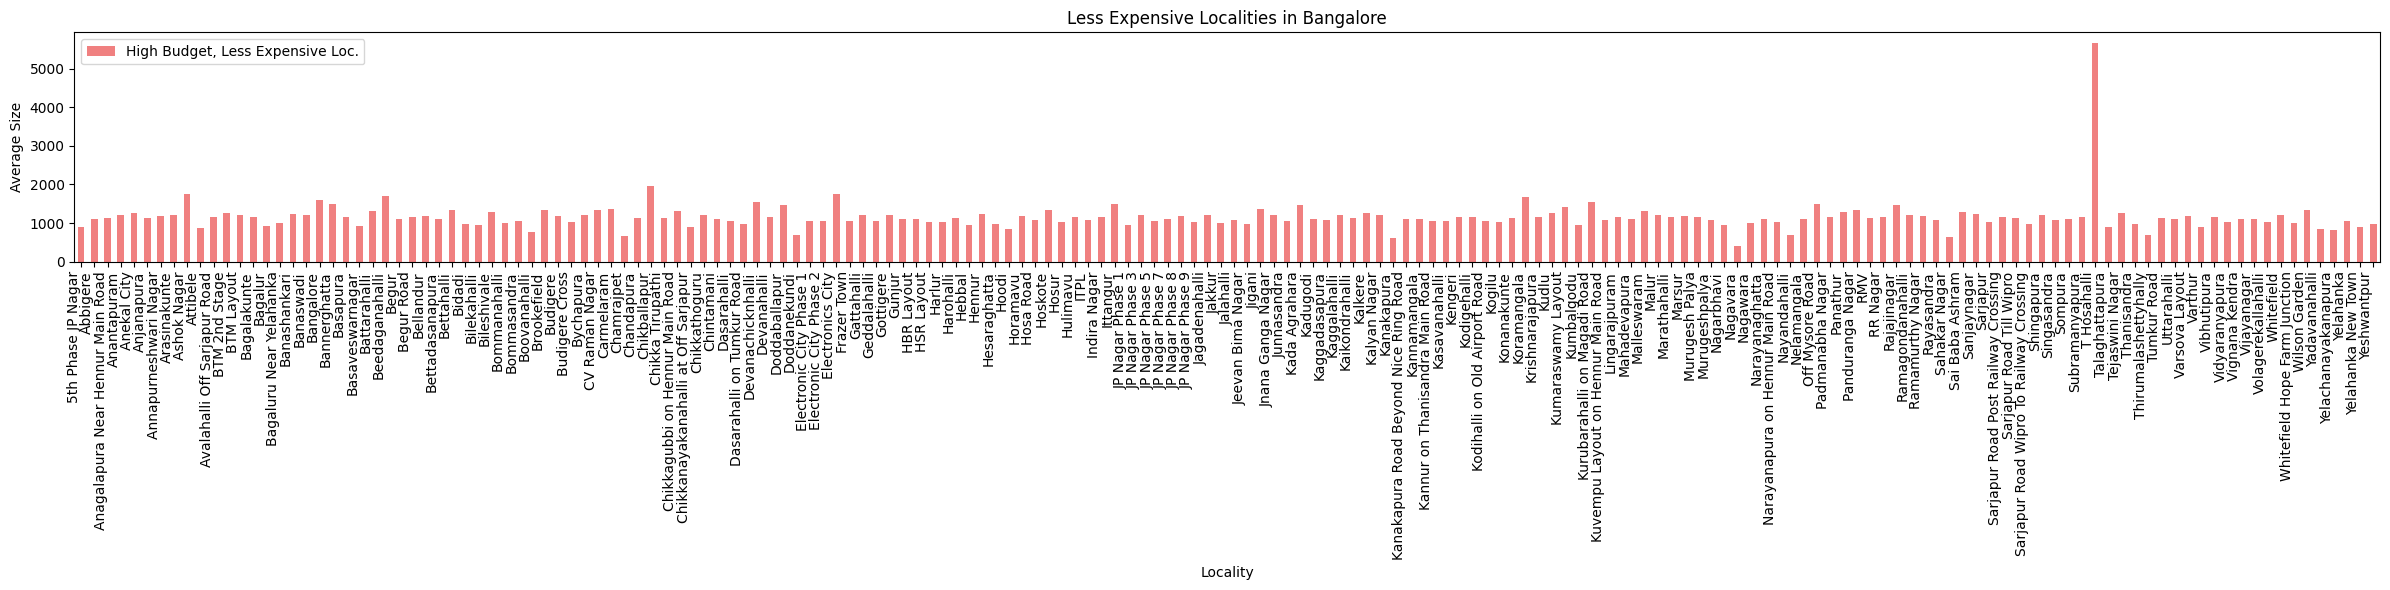

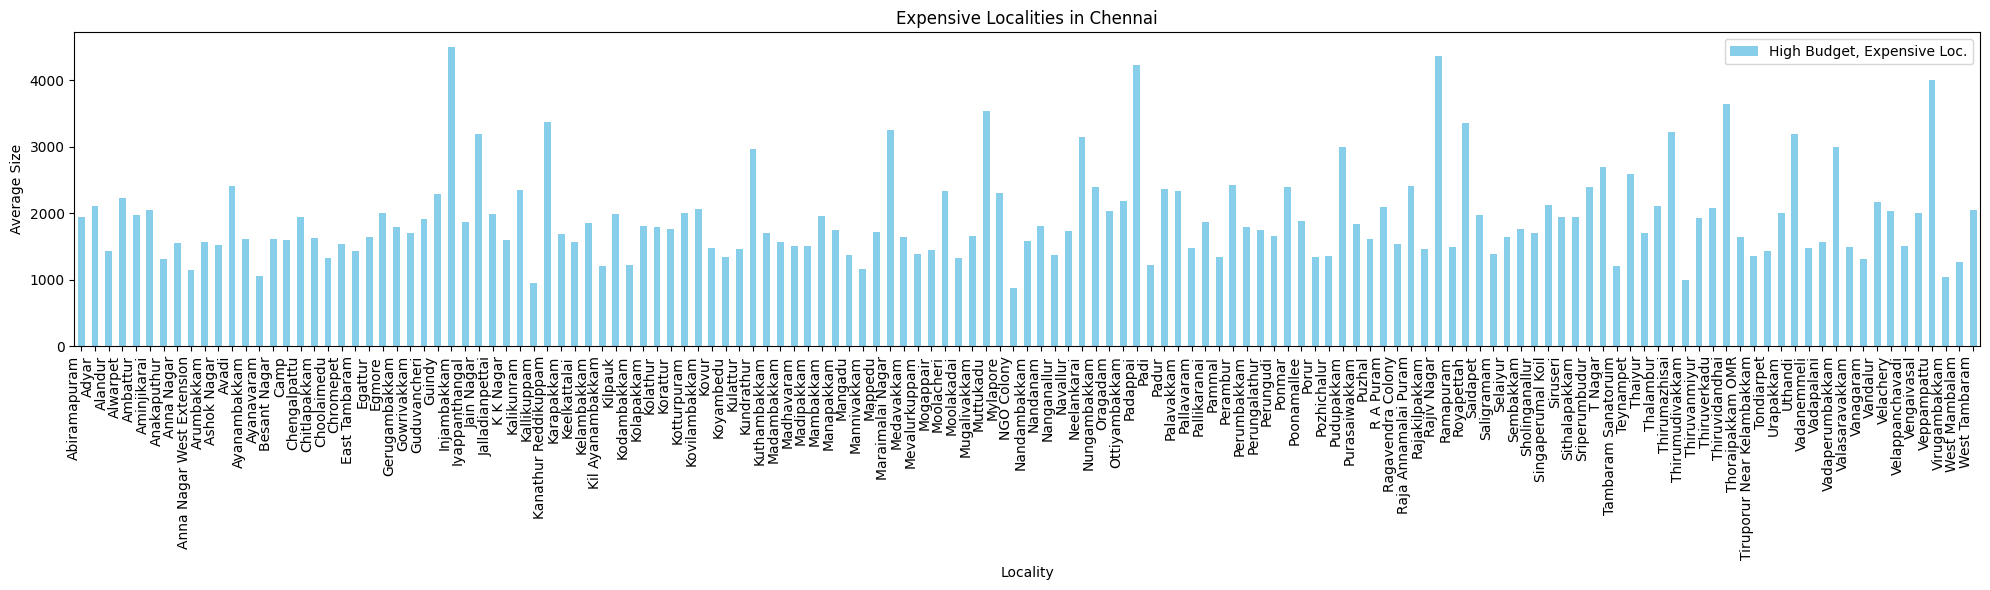

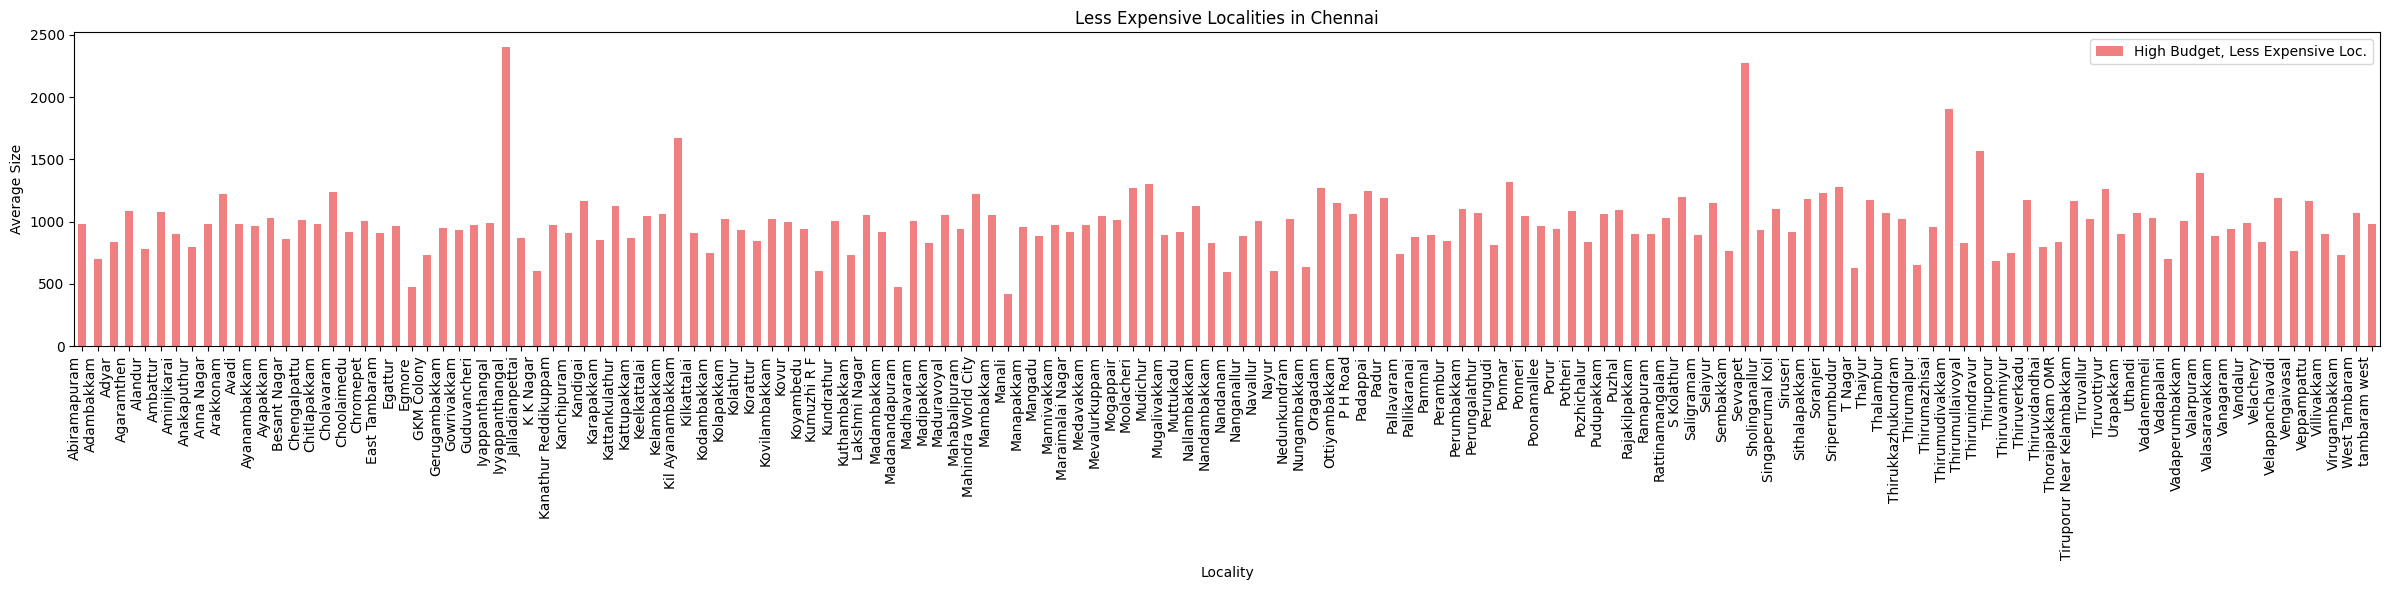

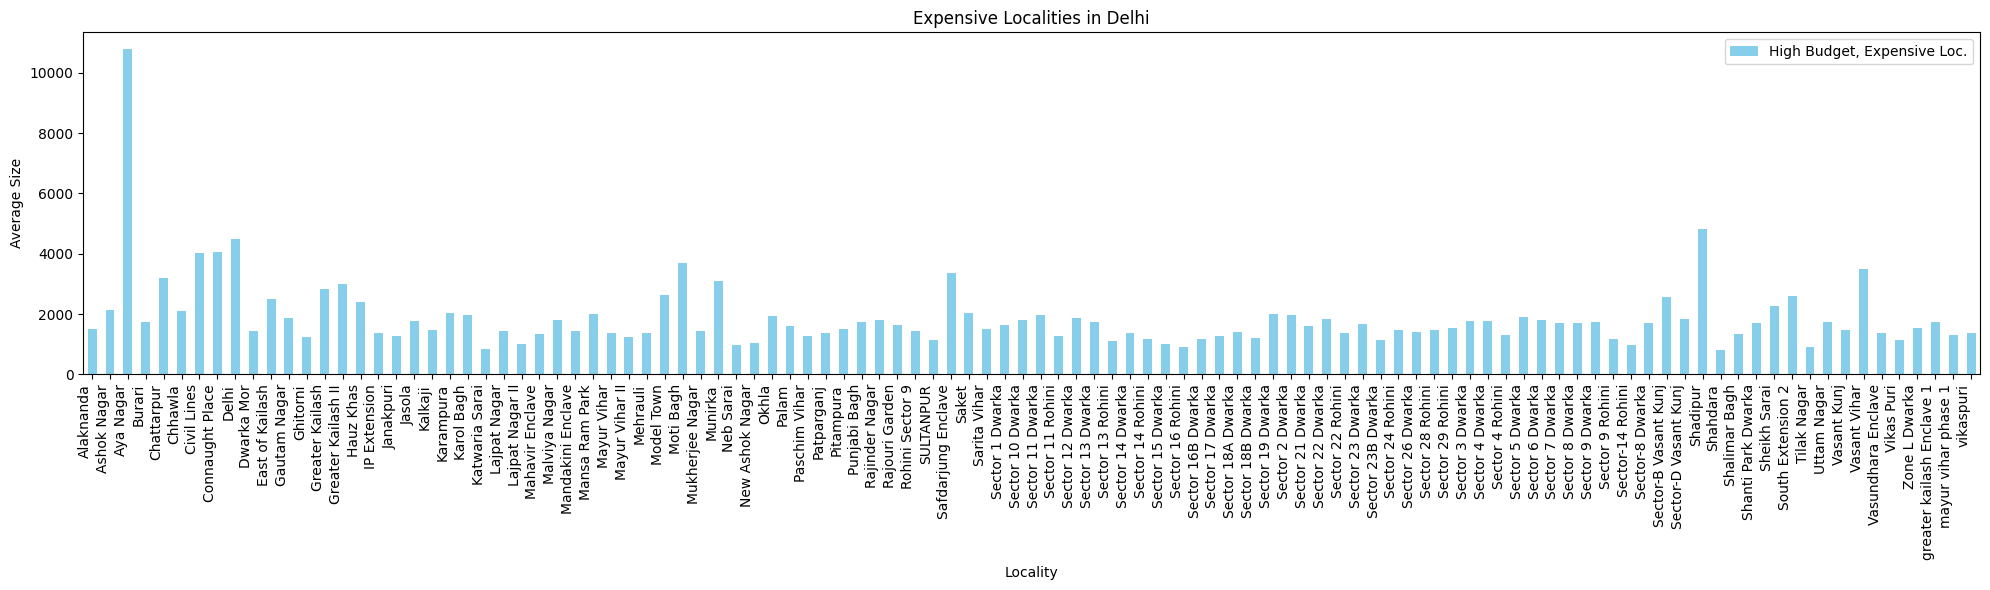

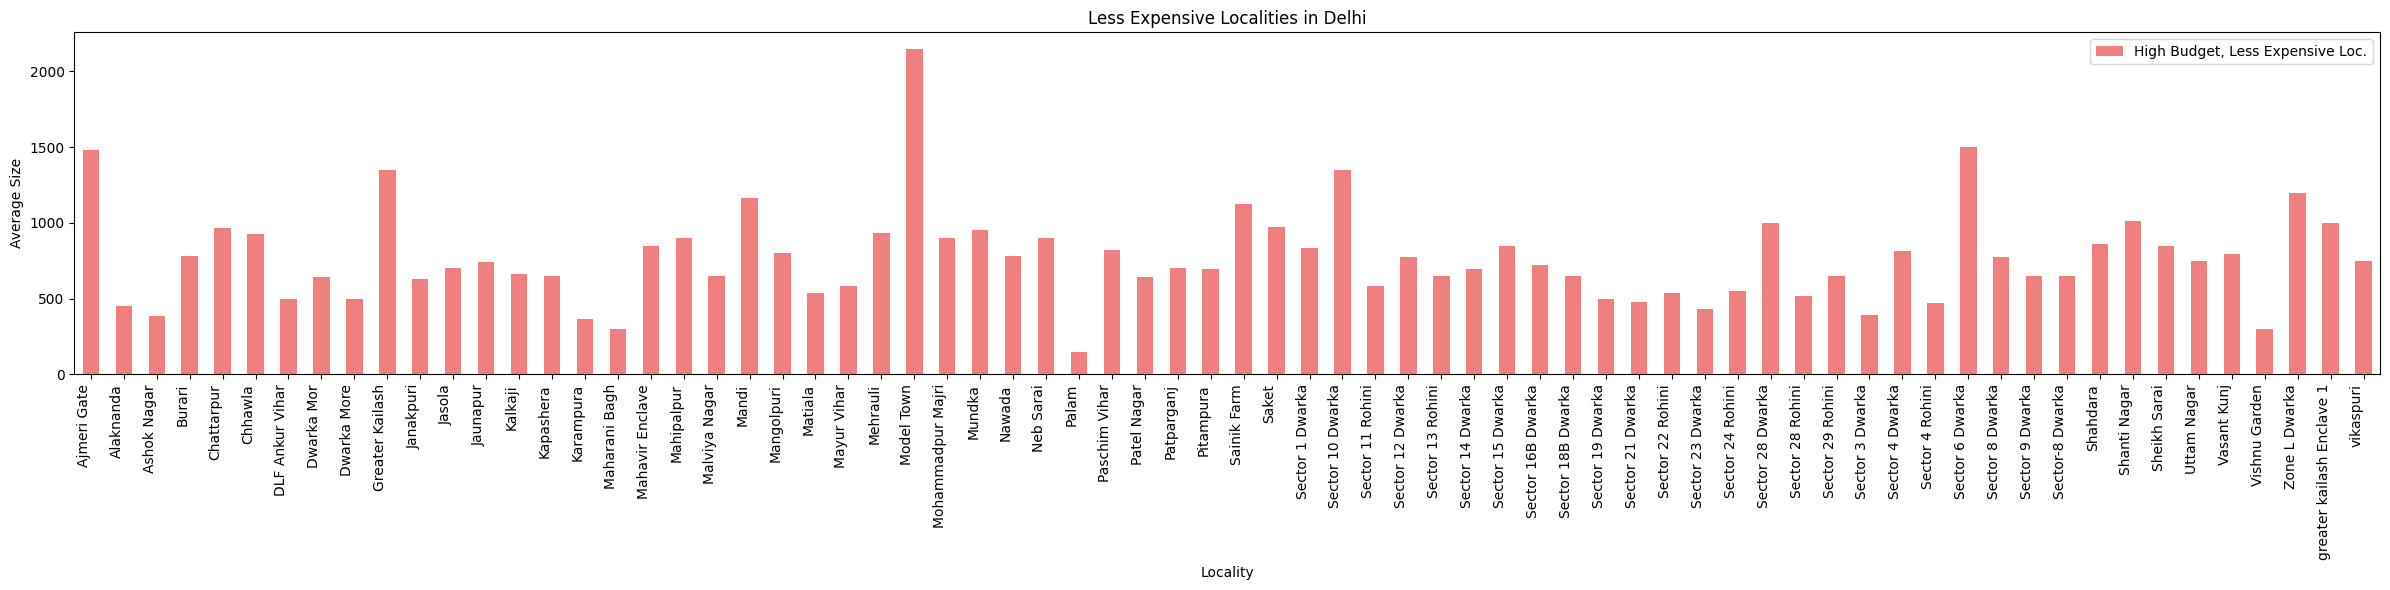

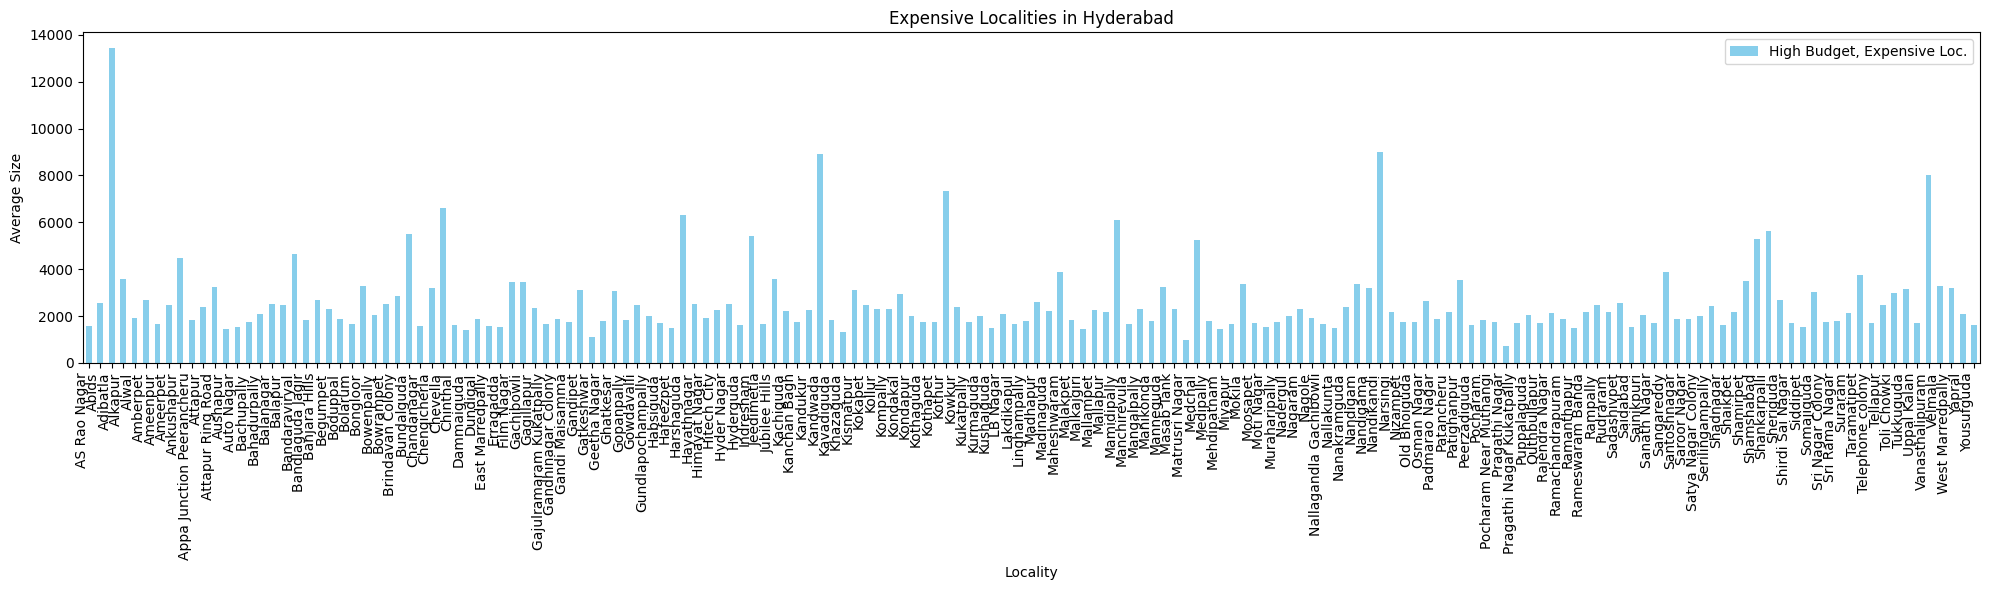

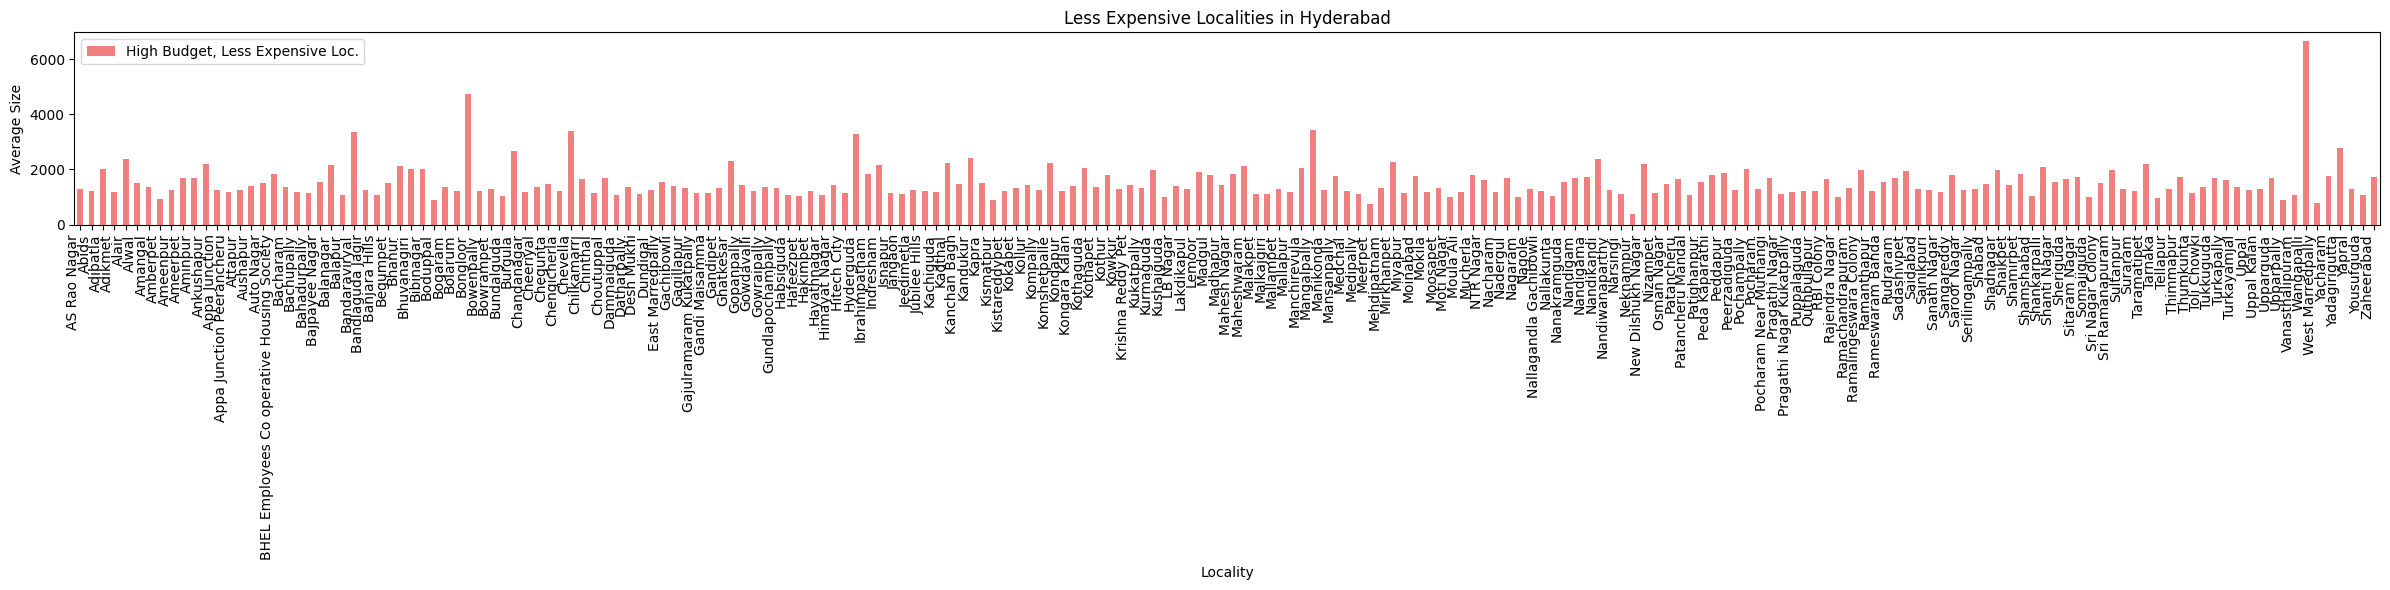

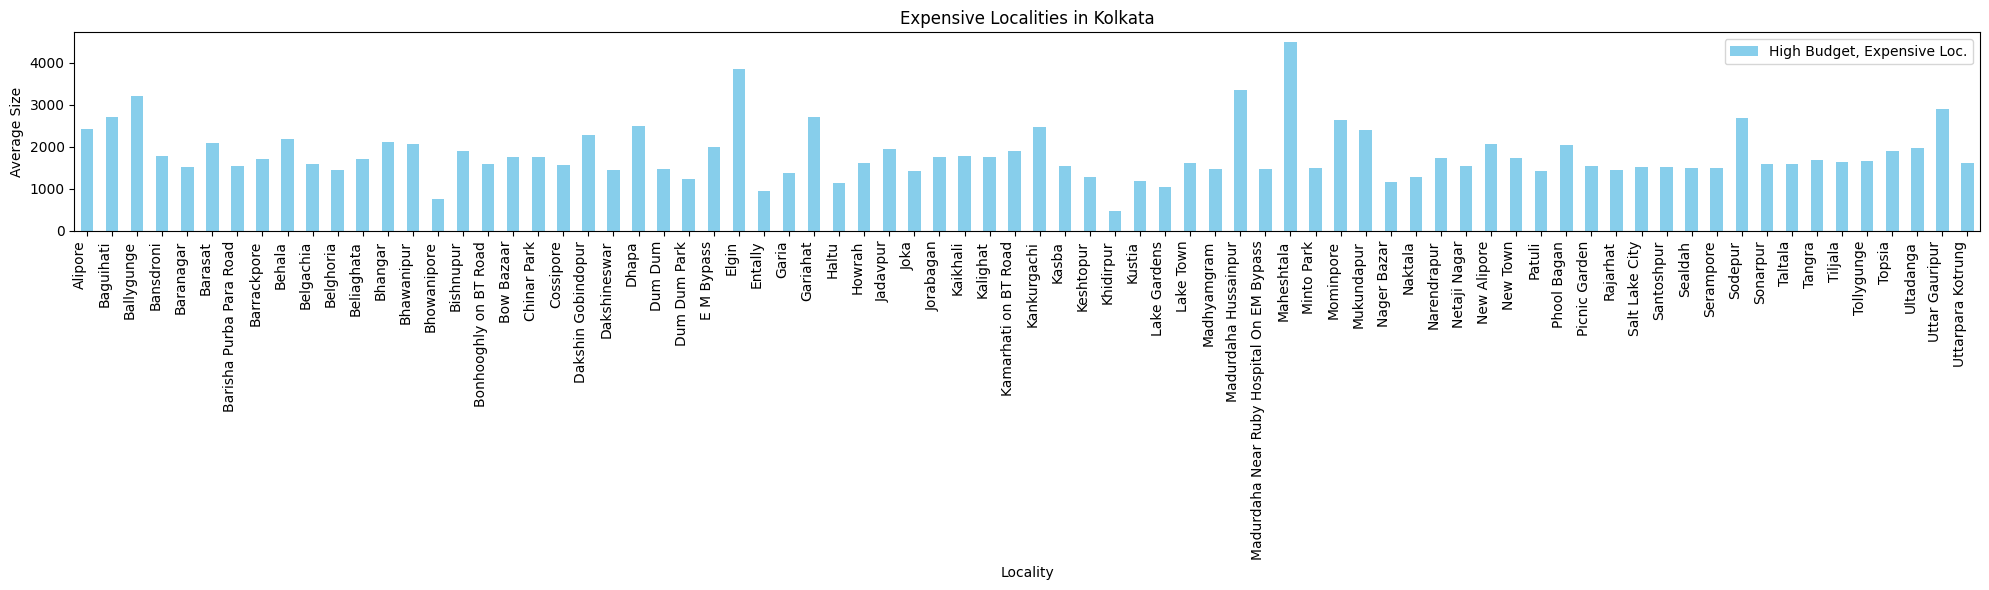

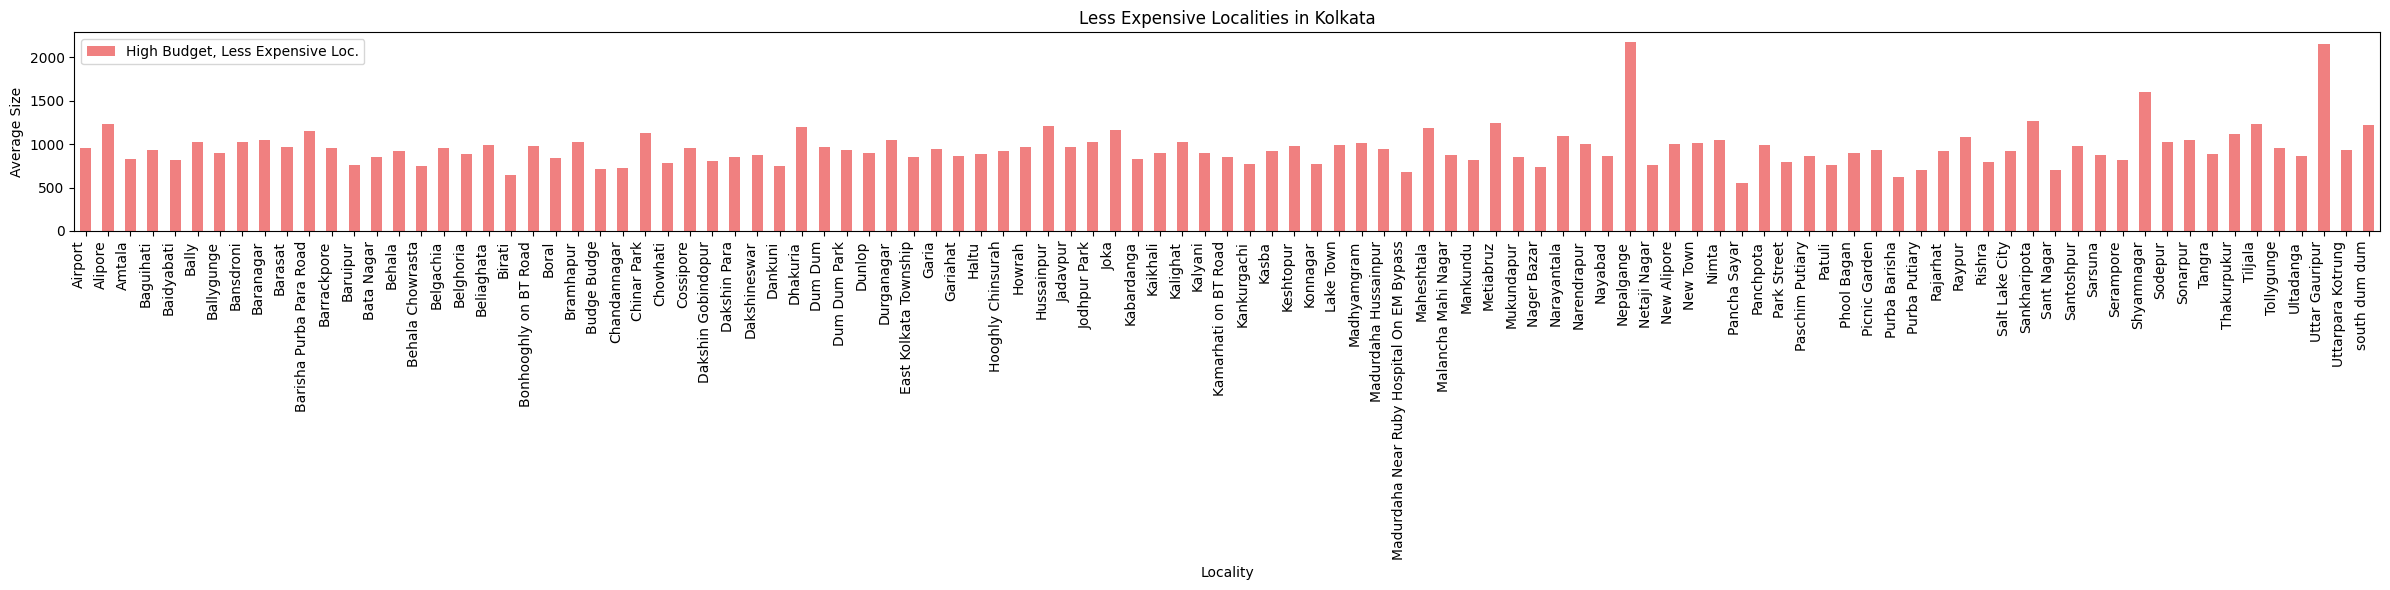

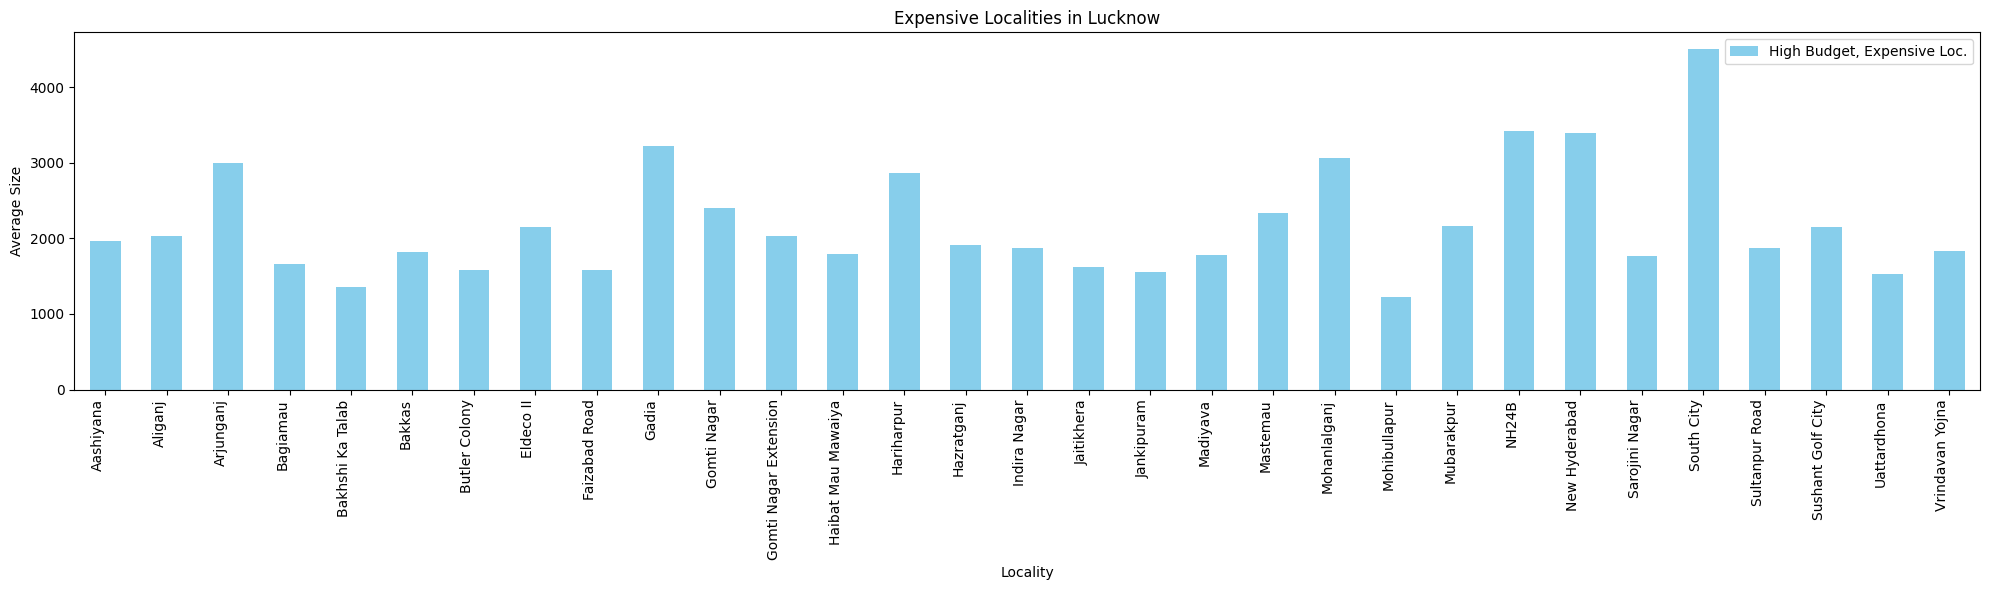

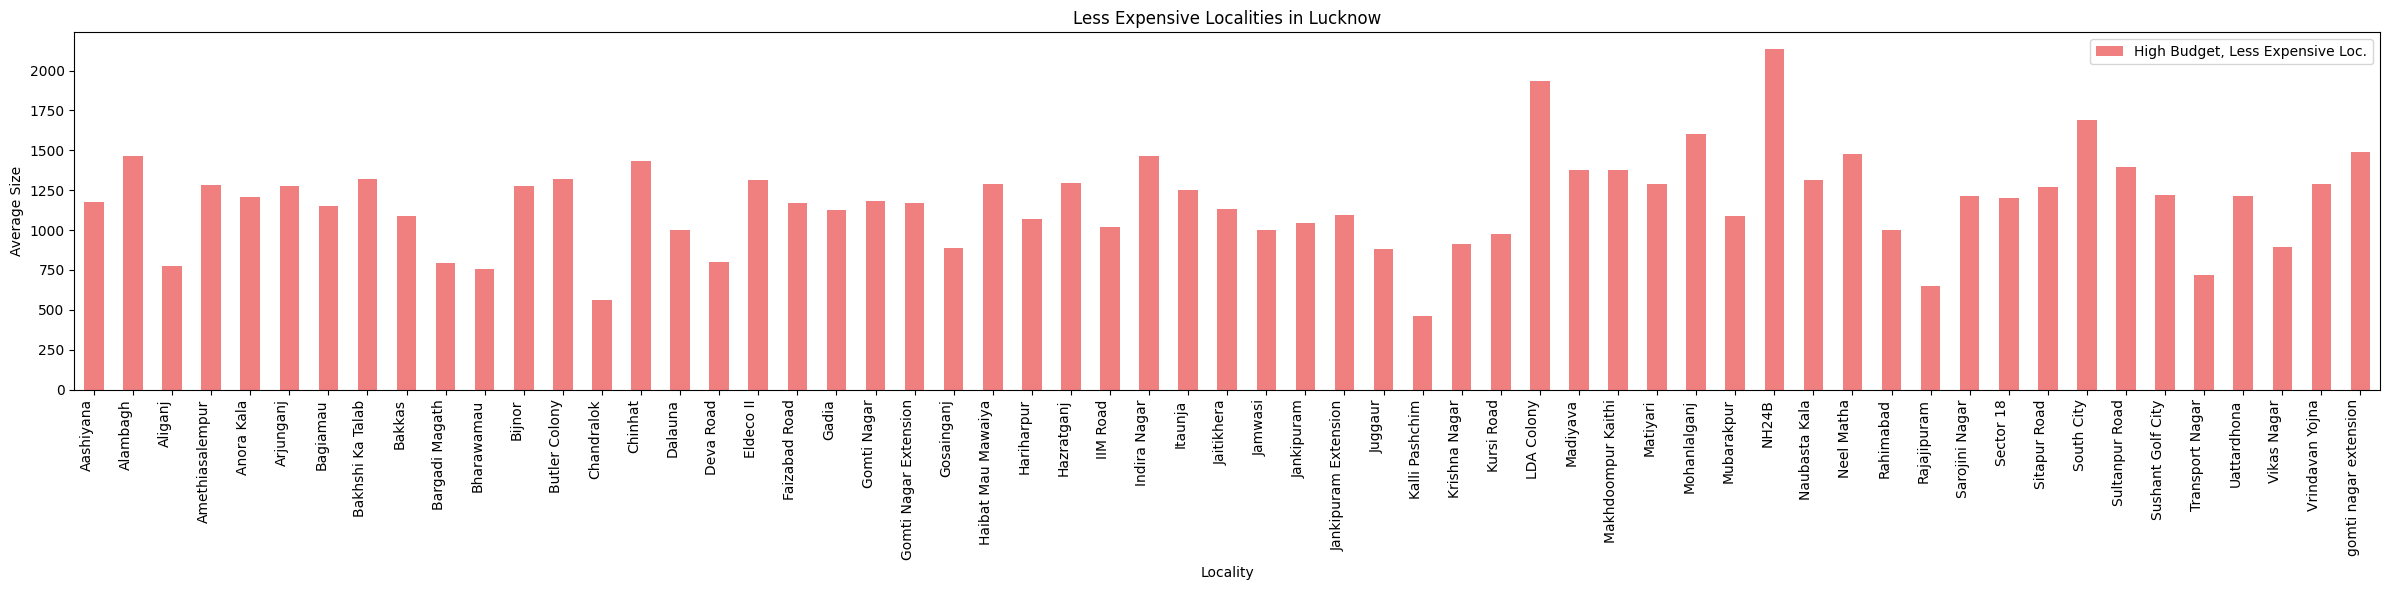

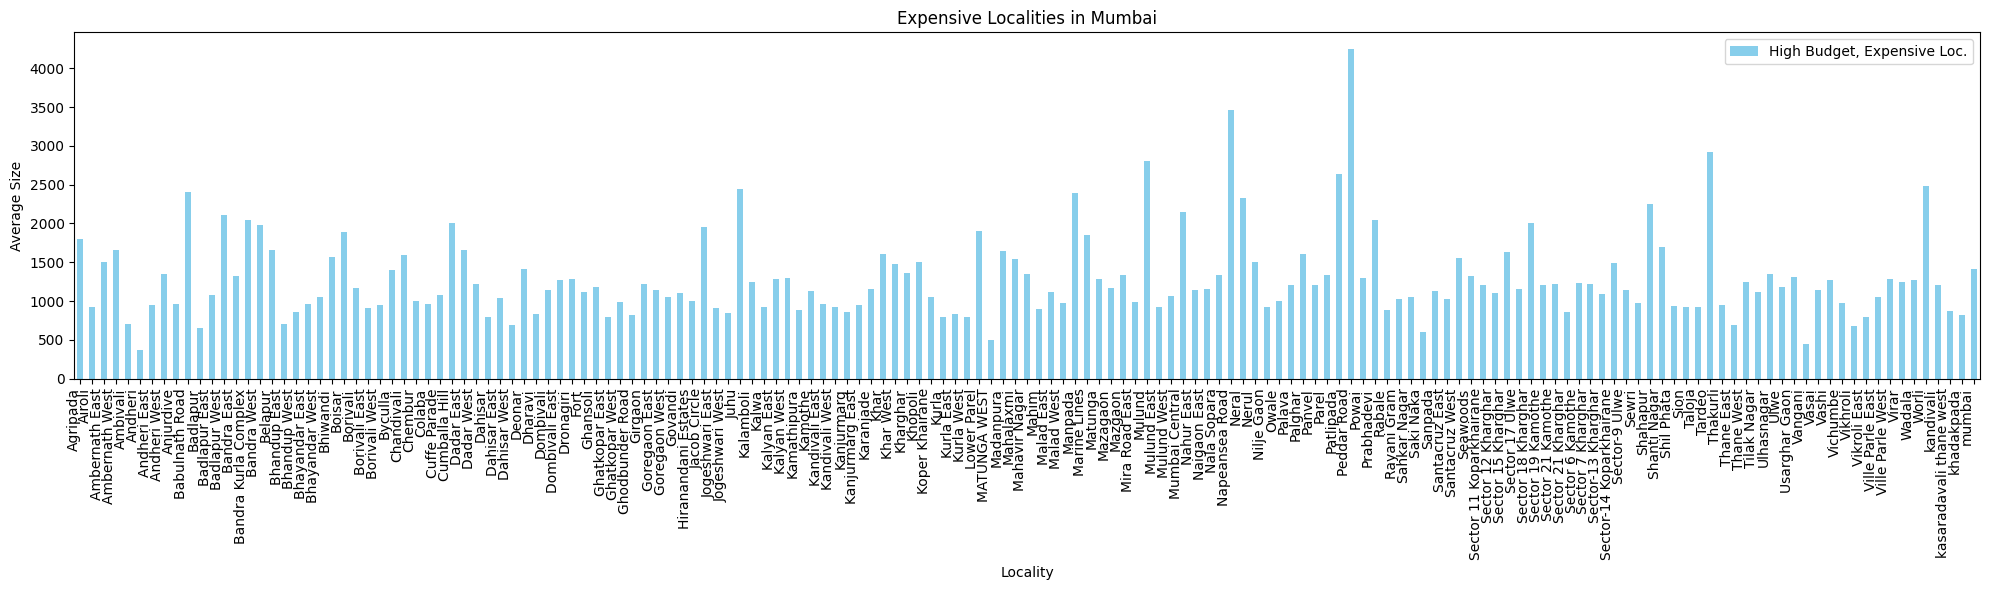

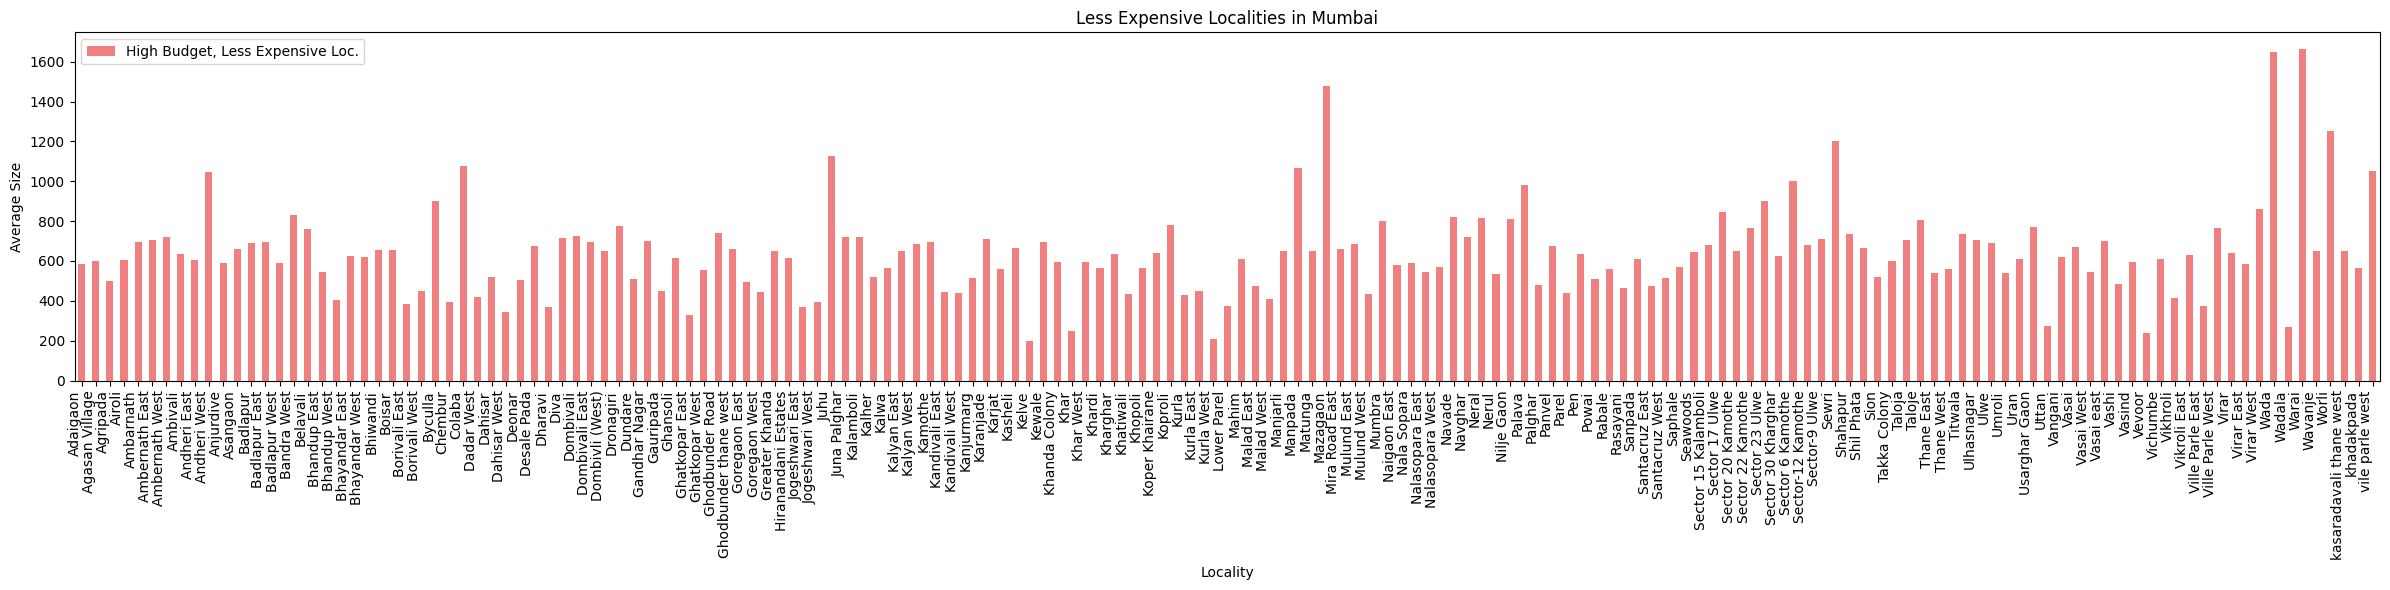

In [15]:
cities= df['City_name'].unique()
for city in cities:
    city_expensive = expensive_localities[expensive_localities['City_name'] == city]
    city_less_expensive = less_expensive_localities[less_expensive_localities['City_name'] == city]
    
    city_expensive_avg_size = city_expensive.groupby("Locality_Name")["Size"].mean()
    city_less_expensive_avg_size = city_less_expensive.groupby("Locality_Name")["Size"].mean()

    plt.figure(figsize=(20, 6))
    
    if not city_expensive_avg_size.empty:
        city_expensive_avg_size.plot(kind="bar", color='skyblue', label="High Budget, Expensive Loc.")
    
    plt.title(f"Expensive Localities in {city}")
    plt.xlabel("Locality")
    plt.ylabel("Average Size")
    plt.legend()
    plt.xticks(rotation=90, ha="right")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(24, 6))
    
    if not city_less_expensive_avg_size.empty:
        city_less_expensive_avg_size.plot(kind="bar", color='lightcoral', label="High Budget, Less Expensive Loc.")
    
    plt.title(f"Less Expensive Localities in {city}")
    plt.xlabel("Locality")
    plt.ylabel("Average Size")
    plt.legend()
    plt.xticks(rotation=90, ha="right")
    plt.tight_layout()
    plt.show()

##### *We saw how different localities had different properties which had high value properties within it*

---
# `Q5`

Text(0, 0.5, 'Size')

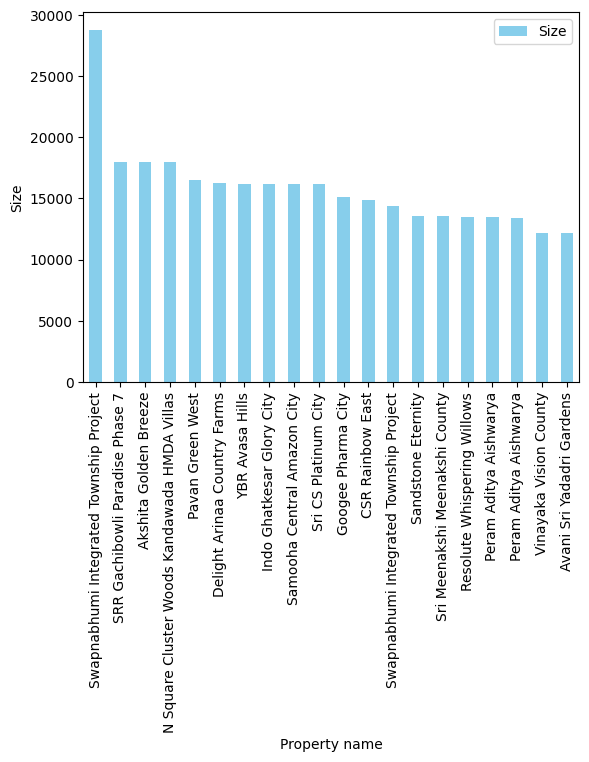

In [16]:
df=df.sort_values(by=["Size"] , ascending=False)
cheapLarge = df[(df["Price"]<= 10000000)]

cheapLarge.head(20).plot(kind='bar',x='Property_Name',y='Size',color='skyblue')
plt.xlabel('Property name')
plt.ylabel('Size')


* *Here we can see that we can sort the data by size and look at the top 10 properties within 1 cr*
---

# `6`

### *I have mentioned two approaches here*: 

    1) Finding the localities with the most amount of multistorey buildings: e.g. Kondapur, Hitech-city in hyderabad 
    2)  Finding the most property-dense localities in the city

In [17]:
df_cities = df[df['City_name'].isin(['Mumbai', 'Ahmedabad'])]

multistorey_rows = df_cities[df_cities['description'].str.contains('multistorey', case=False, na=False)]

locality_counts = multistorey_rows.groupby(['City_name', 'Locality_Name']).size().reset_index(name='Count')

locality_counts_sorted = locality_counts.sort_values(by=['City_name', 'Count'], ascending=[True, False])

top_localities_mumbai = locality_counts_sorted[locality_counts_sorted['City_name'] == 'Mumbai'].head(10)
top_localities_ahmedabad = locality_counts_sorted[locality_counts_sorted['City_name'] == 'Ahmedabad'].head(10)


top_localities_mumbai[['Locality_Name']]

,Locality_Name
191,Mira Road East
249,Thane West
129,Dombivali
170,Kharghar
268,Virar
158,Kandivali East
155,Kalyan West
214,Powai
211,Panvel
96,Andheri West


In [18]:
top_localities_ahmedabad[["Locality_Name"]]

,Locality_Name
8,Bopal
71,Shela
21,Gota
10,Chandkheda
76,Thaltej
7,Bodakdev
2,Ambli
48,Near Nirma University On SG Highway
72,Shilaj
62,Sanand


* Here, we can see that this gives slightly accurate results compared to real world.


In [19]:
locality_property_counts = df_cities.groupby(['City_name', 'Locality_Name']).size().reset_index(name='Property_Count')

sorted_localities = locality_property_counts.sort_values(by=['Property_Count'], ascending=[False])
ahmedabad_data= sorted_localities[sorted_localities['City_name'] == 'Ahmedabad'].head(10)
mumbai_data= sorted_localities[sorted_localities['City_name'] == 'Mumbai'].head(10)

In [20]:
ahmedabad_data[["City_name","Locality_Name"]]

,City_name,Locality_Name
12,Ahmedabad,Bopal
83,Ahmedabad,Shela
28,Ahmedabad,Gota
14,Ahmedabad,Chandkheda
88,Ahmedabad,Thaltej
11,Ahmedabad,Bodakdev
3,Ahmedabad,Ambli
59,Ahmedabad,Near Nirma University On SG Highway
84,Ahmedabad,Shilaj
74,Ahmedabad,Sanand


In [21]:
mumbai_data[["City_name","Locality_Name"]]

,City_name,Locality_Name
212,Mumbai,Mira Road East
279,Mumbai,Thane West
146,Mumbai,Dombivali
190,Mumbai,Kharghar
300,Mumbai,Virar
177,Mumbai,Kandivali East
174,Mumbai,Kalyan West
232,Mumbai,Panvel
110,Mumbai,Andheri West
237,Mumbai,Powai


* *This method also gives very accurate results compared to real world*
***
*** 

*`Thank you!`*
***
***